In [34]:
import torch
import matplotlib.pyplot as plt

# Create a list of sets of N random numbers
N = 3
inputs = torch.randn((10000,N),dtype=torch.float32)
outputs = inputs ** 2

In [35]:
outputs.device

device(type='cpu')

In [36]:
inputs[0]

tensor([-2.2370, -0.6441, -0.1457])

In [37]:
outputs[0]

tensor([5.0040, 0.4148, 0.0212])

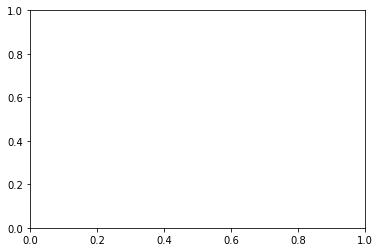

In [38]:
fig_loss, ax_loss = plt.subplots()
test_inputs = torch.randn((1000,N),dtype=torch.float32)
test_outputs = test_inputs ** 2

In [39]:
import pprint

# Create a simple neural network
hidden_nodes = 1000
model = torch.nn.Sequential(
    torch.nn.Linear(inputs.shape[1],hidden_nodes),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_nodes,hidden_nodes),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_nodes,hidden_nodes),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_nodes,hidden_nodes),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_nodes,outputs.shape[1])
)

print('Weights and bias values before training.')
for label in model.state_dict().keys():
    x = model.state_dict()[label]
    print('\n{}: '.format(label))
    pprint.pprint(x)

print('\nCheck the neural network output before training:')
with torch.no_grad():
    model.eval()
    test = torch.tensor([0.1, 0.2, 0.3])
    prediction = model(test)
    print('input: {}, output: {}'.format(test,prediction))

Weights and bias values before training.

0.weight: 
tensor([[-0.4147,  0.4056,  0.5331],
        [ 0.4321, -0.4892,  0.4034],
        [-0.4838,  0.1442, -0.4960],
        ...,
        [ 0.0965,  0.2716,  0.2739],
        [-0.2368,  0.4300, -0.5156],
        [-0.0115, -0.5546,  0.1011]])

0.bias: 
tensor([-1.6400e-01, -3.9883e-01,  3.5992e-01, -4.8095e-01,  5.5921e-02,
         2.0688e-01, -3.6089e-01, -3.8452e-01,  1.3564e-01, -2.7871e-01,
         8.2209e-02, -5.5053e-01, -3.3167e-01, -7.6711e-02,  2.2477e-01,
        -3.6233e-01, -1.2900e-01,  2.3535e-01, -4.6656e-01, -5.7341e-01,
        -7.2326e-02,  3.7930e-01, -5.2286e-01,  4.5561e-01,  4.3486e-01,
        -1.0895e-01,  5.0959e-01, -3.5494e-01,  6.0173e-02,  1.8470e-01,
         4.6372e-01,  4.7095e-01, -1.9063e-01,  3.2076e-01, -4.4137e-01,
         4.7182e-01, -5.6137e-01, -3.3305e-01,  2.6858e-02, -2.8140e-01,
        -3.9162e-01,  2.6111e-01,  5.7156e-01, -3.5601e-02, -1.4799e-01,
        -5.5347e-01, -2.2881e-01, -2.1928e-0

In [40]:
import math

# Get ready to train
model.train()

# Break the list up into smaller batches for more efficient training
numMiniBatch = int(math.floor(inputs.shape[0]/100.))
inputMiniBatches = inputs.chunk(numMiniBatch)
outputMiniBatches = outputs.chunk(numMiniBatch)

# Train the neural network
lossFunc = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=1e-4)

n_epochs = 500
for epoch in range(n_epochs):
    # Print something every 10 epochs of training
    if epoch%10 == 0:
        print('=>Starting {}/{} epochs.'.format(epoch+1,n_epochs))
    for minibatch in range(numMiniBatch):
        prediction = model(inputMiniBatches[minibatch])
        loss = lossFunc(prediction,outputMiniBatches[minibatch])
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    total_prediction = model(inputs)
    total_loss = lossFunc(total_prediction, outputs).item()
    test_total_prediction = model(test_inputs)
    test_total_loss = lossFunc(test_total_prediction, test_outputs).item()
    ax_loss.plot(epoch, total_loss, 'bo', markersize=1, label='Training')
    ax_loss.plot(epoch, test_total_loss, 'go', markersize=1, label='Testing')
    ax_loss.set_xlabel('Epochs')
    ax_loss.set_ylabel('Total Loss')
# ax_loss.legend()
    


print ('Training done!')

=>Starting 1/500 epochs.
=>Starting 11/500 epochs.


KeyboardInterrupt: 

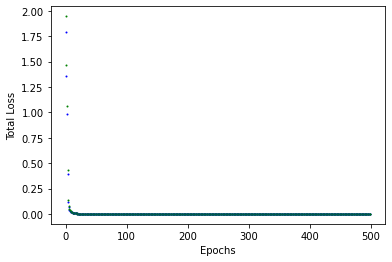

In [26]:
fig_loss

In [108]:
fig_loss.savefig('loss.pdf')

In [110]:
with torch.no_grad():
    model.eval()
    test = torch.tensor([0.1, 0.2, 0.3])
    prediction = model(test)
    print('input: {}, prediction: {}'.format(test,prediction))

input: tensor([0.1000, 0.2000, 0.3000], device='cuda:0'), prediction: tensor([-0.0027,  0.0355,  0.1050], device='cuda:0')


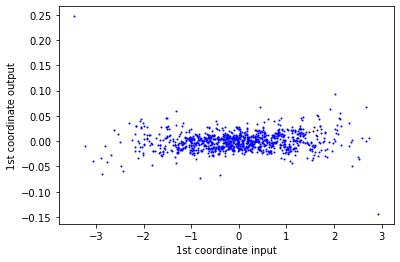

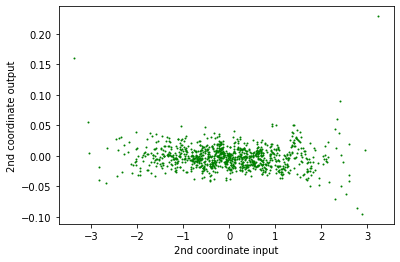

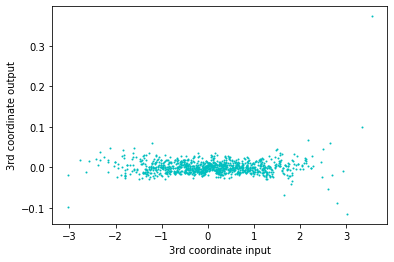

In [113]:
# Check out the output by running the model in evaluation

fig, ax = plt.subplots()
fig2, ax2 = plt.subplots()
fig3, ax3 = plt.subplots()



with torch.no_grad():
    model.eval()
    for input in test_inputs:
        prediction = model(input)
        actual = input ** 2
        residual = actual - prediction
        ax.plot(input[0].item(),residual[0].item(), 'bo', markersize=1)
        ax.set_xlabel('1st coordinate input')
        ax.set_ylabel('1st coordinate output')
        ax2.plot(input[1].item(),residual[1].item(), 'go', markersize=1)
        ax2.set_xlabel('2nd coordinate input')
        ax2.set_ylabel('2nd coordinate output')
        ax3.plot(input[2].item(),residual[2].item(), 'co', markersize=1)
        ax3.set_xlabel('3rd coordinate input')
        ax3.set_ylabel('3rd coordinate output')

TypeError: forward() missing 1 required positional argument: 'target'

In [8]:
fig.savefig('1st-1st.pdf')
fig2.savefig('2nd-2nd.pdf')
fig3.savefig('3rd-3rd.pdf')

In [19]:
# Let's look at the weights and biases
# Check the math by hand
A = model.state_dict()['0.weight'].tolist()
a = model.state_dict()['0.bias'].tolist()
print('\nWeights and biases for first layer.')
pprint.pprint(A)
print()
pprint.pprint(a)

B = model.state_dict()['2.weight'].tolist()
b = model.state_dict()['2.bias'].tolist()
print('\nWeights and biases for second layer.')
pprint.pprint(B)
print()
pprint.pprint(b)


Weights and biases for first layer.
[[-0.051797930151224136, 0.020460927858948708, 0.4521941840648651],
 [0.3628493845462799, 0.30196699500083923, -0.3067696690559387],
 [-0.16023683547973633, 0.5676299929618835, -0.2691231369972229],
 [-0.5061841011047363, -0.15636256337165833, -0.35088101029396057],
 [0.3080293834209442, -0.5990816354751587, -0.2477128952741623],
 [-0.1203937828540802, 0.02602064609527588, 0.027059853076934814],
 [0.2657926678657532, -0.22902531921863556, 0.1552303284406662],
 [0.551249086856842, -0.008695131167769432, 0.11945633590221405],
 [-0.03034021332859993, 0.0672479197382927, -0.4217241704463959],
 [0.17655999958515167, 0.5618171691894531, 0.0454804003238678],
 [0.012841857969760895, 0.4363231360912323, 0.05188861861824989],
 [0.09803716838359833, -0.21163827180862427, 0.011461320333182812],
 [0.3450448215007782, -0.003867021296173334, 0.3709186017513275],
 [0.6213380098342896, -0.06966973096132278, -0.25546184182167053],
 [-0.08092330396175385, 0.0531331859

  0.0755835548043251,
  0.4203547537326813,
  0.5121822953224182,
  -0.015546949580311775,
  -0.03592874854803085,
  0.5014967322349548,
  0.018932193517684937,
  -0.03510226681828499,
  0.1407642662525177,
  0.024446610361337662,
  0.07419303804636002,
  0.10003916919231415,
  0.028230689465999603,
  0.04499049857258797,
  0.06375713646411896,
  0.06775491684675217,
  -0.008866311982274055,
  0.011098663322627544,
  0.12637783586978912,
  0.5599499344825745,
  0.024358971044421196,
  0.003212061943486333,
  0.04511653631925583,
  -0.08187776803970337,
  -0.038909029215574265,
  0.032245248556137085,
  0.006081298924982548,
  -0.052963946014642715,
  -0.03880973532795906,
  0.14729662239551544,
  0.004098652396351099,
  0.43360191583633423,
  0.04523463919758797,
  -0.030959520488977432,
  -0.008423975668847561,
  -0.14558124542236328,
  0.06390517950057983,
  0.2885247468948364,
  0.23234252631664276,
  -0.027861274778842926,
  0.004233419429510832,
  0.08437641710042953,
  0.01362567

In [28]:
# Work out the details
x0 = test[0].item()
x1 = test[1].item()
x2 = test[2].item()

print('Input to neural network:')
print('x0={:7.4f}, x1={:7.4f},x2={:7.4f}'.format(x0,x1,x2))

# Check the math by hand
A = model.state_dict()['0.weight'].tolist()
a = model.state_dict()['0.bias'].tolist()

sum0 = A[0][0]*x0+A[0][1]*x1+A[0][2]*x2+a[0]
sum1 = A[1][0]*x0+A[1][1]*x1+A[1][2]*x2+a[1]
sum2 = A[2][0]*x0+A[2][1]*x1+A[2][2]*x2+a[2]
print('\nSums for first layer:')
print('{:7.4f} = {:7.4f} * {:7.4f} + {:7.4f} * {:7.4f} + {:7.4f} * {:7.4f} + {:7.4f}'.format(sum0,A[0][0],x0,A[0][1],x1,A[0][2],x2,a[0]))
print('{:7.4f} = {:7.4f} * {:7.4f} + {:7.4f} * {:7.4f} + {:7.4f} * {:7.4f} + {:7.4f}'.format(sum1,A[1][0],x0,A[1][1],x1,A[1][2],x2,a[1]))
print('{:7.4f} = {:7.4f} * {:7.4f} + {:7.4f} * {:7.4f} + {:7.4f} * {:7.4f} + {:7.4f}'.format(sum2,A[2][0],x0,A[2][1],x1,A[2][2],x2,a[2]))

y0 = max(sum0,0)
y1 = max(sum1,0)
y2 = max(sum2,0)
print('\nApplying the ReLU to the sums:')
print('y0 = {:7.4f} = ReLU({:7.4f})'.format(y0,sum0))
print('y1 = {:7.4f} = ReLU({:7.4f})'.format(y1,sum1))
print('y2 = {:7.4f} = ReLU({:7.4f})'.format(y2,sum2))

B = model.state_dict()['2.weight'].tolist()
b = model.state_dict()['2.bias'].tolist()

z0 = B[0][0]*y0+B[0][1]*y1+B[0][2]*y2+b[0]
z1 = B[1][0]*y0+B[1][1]*y1+B[1][2]*y2+b[1]
z2 = B[2][0]*y0+B[2][1]*y1+B[2][2]*y2+b[2]
print('\nCalculating the final output:')
print('z0 = {:7.4f} = {:7.4f} * {:7.4f} + {:7.4f} * {:7.4f} + {:7.4f} * {:7.4f} + {:7.4f}'.format(z0,B[0][0],y0,B[0][1],y1,B[0][2],y2,b[0]))
print('z1 = {:7.4f} = {:7.4f} * {:7.4f} + {:7.4f} * {:7.4f} + {:7.4f} * {:7.4f} + {:7.4f}'.format(z1,B[1][0],y0,B[1][1],y1,B[1][2],y2,b[1]))
print('z2 = {:7.4f} = {:7.4f} * {:7.4f} + {:7.4f} * {:7.4f} + {:7.4f} * {:7.4f} + {:7.4f}'.format(z2,B[2][0],y0,B[2][1],y1,B[2][2],y2,b[2]))

Input to neural network:
x0= 0.1000, x1= 0.2000,x2= 0.3000

Sums for first layer:
-1.5017 = -1.7414 *  0.1000 +  0.0015 *  0.2000 +  0.0080 *  0.3000 + -1.3302
 0.1035 =  0.0180 *  0.1000 + -0.1089 *  0.2000 + -1.8229 *  0.3000 +  0.6703
-0.6789 = -0.0095 *  0.1000 +  1.7540 *  0.2000 + -0.0082 *  0.3000 + -1.0263

Applying the ReLU to the sums:
y0 =  0.0000 = ReLU(-1.5017)
y1 =  0.1035 = ReLU( 0.1035)
y2 =  0.0000 = ReLU(-0.6789)

Calculating the final output:
z0 =  0.1775 =  1.8518 *  0.0000 +  0.0013 *  0.1035 + -0.0027 *  0.0000 +  0.1774
z1 =  0.0826 = -0.0023 *  0.0000 + -0.0011 *  0.1035 +  1.5371 *  0.0000 +  0.0827
z2 = -1.3168 =  0.0115 *  0.0000 +  1.1589 *  0.1035 +  0.1093 *  0.0000 + -1.4367
